## 4.1 Ord antal og histogrammer


### 4.1.1 Angiv udvælgelseskriterier

**Trin 1**

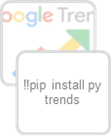




Først installeres pytrends

In [ ]:
#@title installere pytrends
!pip install pytrends

### 4.1.2 Vælg tabeller / filer af interesse

### 4.1.3 Vælg data i en tabel / fil


**Trin 2**


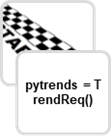

Dernest initialiseres pytrends

In [ ]:
#@title initialisere pytrends
import pandas as pd
import numpy as np
from pytrends.request import TrendReq
pytrends = TrendReq(hl="en-US", tz=360)

**Trin 3**

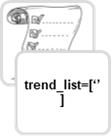

Så angiver vi en liste

In [ ]:
#@title liste
trend_list=['Agurk','Paprika','Brokkoli','Blomkål','Hodekål','Kålrot','Kinakål','Rosenkål','Isbergsalat','Purre','Sjampinjong','Banan','Drue','Melon','Kiwi','Ananas','Pære','Appelsin','Jordbær','Blåbær','Bringebær','Fersken']


**Trin 4-11**


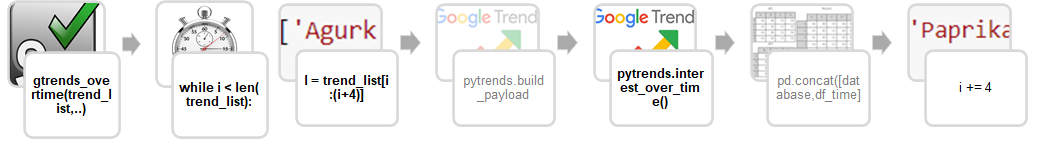

**Trin 4**
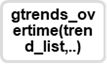

Funksjonen gtrends kjøres.

**Trin 5**

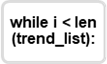

**Trin 6**
Et while loop sjekker længden af ord i listen

**Trin 7**

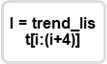

Kun 4 ord kan leses av google trend av gangen.

**Trin 8**

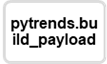

Pytrends forberede parameter til hentning av ord

**Trin 9**

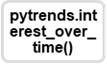

Derefter eksekveres funksjonen for trends over tid

**Trin 10**

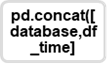

Databasen sammenkobles til den eksisterende data.

**Trin 11**

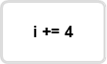

Trends for de neste 4 ord hentes

In [ ]:
#@title hent trends

def gtrends_overtime(full_list, key_ref, save_name="", directory="", category=0, time='all', loc=''):
    i = 0
    database=pd.DataFrame()
    while i < len(trend_list):
        l = trend_list[i:(i+4)]
        l.append(key_ref)
        l=[w.replace('_', ' ') for w in l]
        pytrends.build_payload(l, cat=category, timeframe=time, geo=loc, gprop='')
        df_time = pytrends.interest_over_time()
        df_time.drop(df_time.columns[len(df_time.columns)-1],axis=1, inplace=True)
        database=pd.concat([database,df_time],join="outer", axis=1)      
        i += 4
    return database
data=gtrends_overtime(trend_list, "Pizza", "_worldwide_",directory="",  category=71, time='today 5-y', loc="NO")
data['date']=data.index
data

,Agurk,Paprika,Brokkoli,Blomkål,Pizza,Hodekål,Kålrot,Kinakål,Rosenkål,Pizza,Isbergsalat,Purre,Sjampinjong,Banan,Pizza,Drue,Melon,Kiwi,Ananas,Pizza,Pære,Appelsin,Jordbær,Blåbær,Pizza,Bringebær,Fersken,Pizza,date
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-28,2,13,5,2,51,1,1,0,1,51,0,3,1,8,51,0,1,21,2,49,0,7,7,3,51,3,1,51,2016-02-28
2016-03-06,5,3,11,6,54,0,4,0,0,54,0,4,1,12,54,0,2,16,2,52,2,9,3,5,54,3,0,54,2016-03-06
2016-03-13,3,11,7,5,38,2,3,1,1,38,0,3,2,14,38,0,2,20,2,36,4,13,3,1,38,5,1,38,2016-03-13
2016-03-20,1,4,7,7,58,0,4,1,10,58,0,1,0,4,58,1,3,42,1,55,2,14,9,4,58,2,0,58,2016-03-20
2016-03-27,2,7,10,3,43,0,3,0,2,43,0,1,0,8,43,0,3,16,2,41,1,8,3,4,43,6,2,43,2016-03-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-24,4,7,10,10,78,1,2,1,3,78,0,3,0,12,78,0,2,34,1,74,1,7,7,8,78,5,1,78,2021-01-24
2021-01-31,1,5,8,7,90,1,1,1,5,90,0,1,1,14,90,0,2,34,1,86,1,5,7,4,90,2,1,90,2021-01-31
2021-02-07,3,12,9,7,76,1,4,1,2,76,1,1,1,15,76,0,3,36,1,72,1,8,6,5,76,9,0,76,2021-02-07


Dernest kan vi ses data for trends.

In [ ]:
#@title visning af trends
data.replace([np.inf, -np.inf], np.nan)
data=data.dropna()

data = data.loc[:,~data.columns.duplicated()]


labels=list(data.columns.unique().drop(['date']))

import altair as alt

brush_sel = alt.selection(type='interval', encodings=['x'])

nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')

lower=alt.Chart(data).transform_fold(labels).mark_line().encode(
    y=alt.Y('value:Q'),
    x='date:T',
    color='key:N'
).properties(width=300,height=300).add_selection(brush_sel)

upper=lower.transform_window(
    rolling_mean='mean(value)',
    frame=[-2, 2]
).mark_bar(opacity=0.9).encode(
    y=alt.Y("value:Q"), #,sort='-y' , stack=None
    x='yearmonth(date):O',
    color='key:N',
    
    tooltip=alt.Tooltip(['key:N','value:N']),
).properties(width=300,height=300).transform_filter(brush_sel)

selectors = alt.Chart(data).transform_fold(labels).mark_point().encode(
    x='value:Q',
    color='key:N',
    opacity=alt.value(0),
).add_selection(
    nearest
)

up=alt.layer(upper)


alt.vconcat(up,lower).save("ord.html")

Hvordan kan vi skape verdi med datasettet? og for hvilken målgruppe?